## Observations and Insights 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer').reset_index()
# Display the data table for preview
study_df[study_df['Mouse ID']== 'a275'].head(10)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,488,a275,Ceftamin,Female,20,28,20,50.513437,1
489,489,a275,Ceftamin,Female,20,28,25,53.576064,1
490,490,a275,Ceftamin,Female,20,28,30,54.444713,2
491,491,a275,Ceftamin,Female,20,28,35,56.353538,2
492,492,a275,Ceftamin,Female,20,28,40,60.921539,3
493,493,a275,Ceftamin,Female,20,28,45,62.999356,3


In [2]:
# Checking the number of mice.
print(f"Number of mice: {len(study_df['Mouse ID'].unique())}")

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

study_df['Mouse ID'].value_counts()



g989    13
m957    10
m550    10
a251    10
a897    10
        ..
h428     1
x336     1
d133     1
l872     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = study_df[study_df['Mouse ID'] == 'g989']
mouse_g989.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,908,g989,Propriva,Female,21,26,0,45.000000,0
909,909,g989,Propriva,Female,21,26,0,45.000000,0
910,910,g989,Propriva,Female,21,26,5,48.786801,0
911,911,g989,Propriva,Female,21,26,5,47.570392,0
912,912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = study_df[study_df['Mouse ID'] != 'g989']
study_df['Mouse ID'].value_counts()

m957    10
m550    10
i334    10
b879    10
a897    10
        ..
n482     1
d133     1
x226     1
u153     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of mice: {len(study_df['Mouse ID'].unique())}")

Number of mice: 248


## Summary Statistics

In [7]:
study_df[study_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].describe()

count    228.000000
mean      40.216745
std        4.846308
min       22.050126
25%       36.674635
50%       40.673236
75%       45.000000
max       47.622816
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward: creating multiple series and putting them all together at the end.

treatments = study_df['Drug Regimen'].unique()
summary_df = pd.DataFrame()
for treatment in treatments:
    summary_df[treatment] = study_df[study_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].describe()
summary_df

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
count,228.000000,230.000000,178.000000,181.000000,178.000000,181.000000,182.000000,188.000000,148.000000,186.000000
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.320930,54.331565
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.622085,8.134708
min,22.050126,23.343598,36.321346,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
25%,36.674635,37.685933,47.312353,47.459053,47.208427,48.047139,47.337876,48.232987,46.894328,47.285874
50%,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.446266,52.509285
75%,45.000000,45.000000,57.314444,59.916934,56.801438,58.719297,57.954259,60.870951,56.491585,59.963034
max,47.622816,48.158209,72.226731,73.212939,68.923185,75.123690,73.324432,78.567014,72.455421,76.668817


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

study_summary = study_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)':['mean','median','var','std','sem']
})
study_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

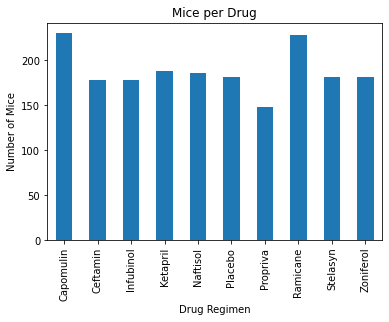

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
study_df.groupby('Drug Regimen').agg({
    'Mouse ID':'count'
}).plot(kind = 'bar', legend = False)
plt.ylabel('Number of Mice')
plt.title('Mice per Drug')
plt.show()

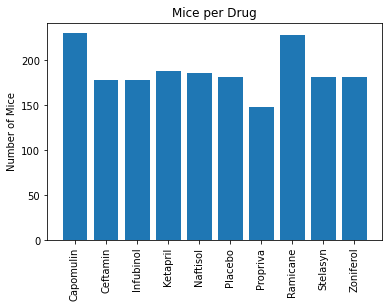

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_bar_df = study_df.groupby('Drug Regimen').agg({
    'Mouse ID':'count'
}).reset_index()
x_axis = range(len(mouse_bar_df['Mouse ID']))
data = mouse_bar_df['Mouse ID']
xlabels = mouse_bar_df['Drug Regimen']
plt.bar(x_axis, data)
plt.xticks(x_axis, xlabels, rotation = 90)
plt.ylabel('Number of Mice')
plt.title('Mice per Drug')
plt.show()


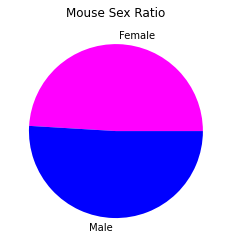

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
study_df.groupby('Sex').agg({
    'Mouse ID':'count'
}).plot.pie(y = 'Mouse ID', legend = False, colors = ['magenta','blue'])
plt.ylabel('')
plt.title('Mouse Sex Ratio')
plt.show()

Text(0.5, 1.0, 'Mouse Sex Ratio')

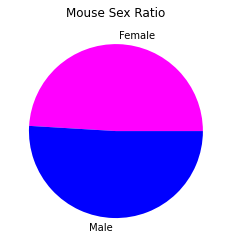

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_df = study_df.groupby('Sex').agg({
    'Mouse ID':'count'
}).reset_index()
mouse_sex_df = mouse_sex_df.rename({
    'Mouse ID':'Count'
}, axis = 1)
mouse_sex_df
labels = mouse_sex_df['Sex']
sizes = mouse_sex_df['Count']
plt.pie(sizes, labels = labels, colors = ['magenta','blue'])
plt.title('Mouse Sex Ratio')

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
    #Sorting by Timepoint before grouping so that the largest timepoint is last.  This makes the second step
    #unnecessary. 
max_tumor = study_df.sort_values(by = ['Timepoint'], axis = 0, ascending = True).reset_index()
max_tumor = max_tumor.groupby('Mouse ID').agg({
    'Sex': 'first',
    'Age_months': 'mean',
    'Weight (g)': 'mean',
    'Timepoint': 'max',
    'Tumor Volume (mm3)': 'last'
})

max_tumor.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    #This step is made unnecessary by sorting before grouping, allowing retention of the 'Tumor Volume (mm3)
    # column.

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
Mouse ID,,,,,
a203,Female,20,23,45,67.973419
a251,Female,21,25,45,65.525743
a262,Female,17,29,45,70.717621
a275,Female,20,28,45,62.999356
a366,Female,16,29,30,63.440686


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = study_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
